In [1]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid

%matplotlib inline

/Users/Andrew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [15]:
StepRate = np.zeros(31)
#StepTime = np.arange(650,805,5) #for colorbar plotting
StepTime = ([ 650.,  655.,  655.,  660.,  660.,  665.,  665.,  670.,  670.,
        675.,  675.,  680.,  680.,  685.,  685.,  690.,  690.,  695.,
        695.,  700.,  700.,  705.,  705.,  710.,  710.,  715.,  715.,
        720.,  720.,  725.,  725.,  730.,  730.,  735.,  735.,  740.,
        740.,  745.,  745.,  750.,  750.,  755.,  755.,  760.,  760.,
        765.,  765.,  770.,  770.,  775.,  775.,  780.,  780.,  785.,
        785.,  790.,  790.,  795.,  795.,  800.])
min_spreading_rate = np.full_like(StepRate, 20)
max_spreading_rate = np.full_like(StepRate, 70)

empty_775_nans = np.empty(10,)
empty_775_nans[:] = np.nan

empty_750_nans = np.empty(20,)
empty_750_nans[:] = np.nan

empty_725_nans = np.empty(30,)
empty_725_nans[:] = np.nan

In [16]:
Missing_Link_rate_800_max = np.asarray([ 200.47579766,  200.47579766,  196.82938529,  196.82938529,
         192.76224404,  192.76224404,  152.99294202,  152.99294202,
         155.43460648,  155.43460648,  157.18221357,  157.18221357,
         158.27211451,  158.27211451,  158.75026106,  158.75026106,
         158.67213052,  158.67213052,  158.10249208,  158.10249208,
          72.24262576,   72.24262576,   70.11481962,   70.11481962,
          67.91937121,   67.91937121,   65.65836141,   65.65836141,
          63.3340952 ,   63.3340952 ,   60.94911453,   60.94911453,
          58.50621623,   58.50621623,   56.00847647,   56.00847647,
          53.45928469,   53.45928469,   50.86239035,   50.86239035,
          13.38496449,   13.38496449,   25.08896975,   25.08896975,
          21.49587168,   21.49587168,   17.88618589,   17.88618589,
          14.28655531,   14.28655531,   10.74969636,   10.74969636,
         112.82645828,  112.82645828,  112.65054436,  112.65054436,
         112.45826674,  112.45826674,  112.2505474 ,  112.2505474])

Missing_Link_rate_800_mid = np.asarray([209.37205057,  209.37205057,  206.9540106 ,  206.9540106 ,
         204.10733627,  204.10733627,  158.49603693,  158.49603693,
         158.78072736,  158.78072736,  158.40280568,  158.40280568,
         157.42331846,  157.42331846,  155.9148034 ,  155.9148034 ,
         153.96115768,  153.96115768,  151.65723501,  151.65723501,
          60.48754038,   60.48754038,   58.02696265,   58.02696265,
          55.51985643,   55.51985643,   52.97128766,   52.97128766,
          50.38699897,   50.38699897,   47.77356298,   47.77356298,
          45.13859077,   45.13859077,   42.49101753,   42.49101753,
          39.84149694,   39.84149694,   37.20294863,   37.20294863,
          12.98077971,   12.98077971,    7.94716263,    7.94716263,
           4.53520273,    4.53520273,    2.37720939,    2.37720939,
           4.30367073,    4.30367073,    7.68636498,    7.68636498,
         113.3682319 ,  113.3682319 ,  113.36457152,  113.36457152,
         113.35959377,  113.35959377,  113.35328181,  113.35328181])

Missing_Link_rate_800_min = np.asarray([206.62527091,  206.62527091,  203.77233753,  203.77233753,
         200.54227624,  200.54227624,  158.50441384,  158.50441384,
         157.67413484,  157.67413484,  156.36629615,  156.36629615,
         154.66530879,  154.66530879,  152.66486411,  152.66486411,
         150.46671054,  150.46671054,  148.17880218,  148.17880218,
          42.6106897 ,   42.6106897 ,   39.85216253,   39.85216253,
          37.05674311,   37.05674311,   34.22864402,   34.22864402,
          31.37267123,   31.37267123,   28.49448383,   28.49448383,
          25.60103529,   25.60103529,   22.70135641,   22.70135641,
          19.80801949,   19.80801949,   16.94005345,   16.94005345,
          19.96371726,   19.96371726,   19.86484672,   19.86484672,
          19.68744413,   19.68744413,   20.10980686,   20.10980686,
          21.09308199,   21.09308199,   22.55761791,   22.55761791,
         112.72272108,  112.72272108,  112.68365619,  112.68365619,
         112.6564337 ,  112.6564337 ,  112.64168055,  112.64168055])

Missing_Link_rate_800_ave = np.asarray([205.49103971,  205.49103971,  202.51857781,  202.51857781,
        199.13728552,  199.13728552,  156.66446426,  156.66446426,
        157.29648956,  157.29648956,  157.31710513,  157.31710513,
        156.78691392,  156.78691392,  155.77664286,  155.77664286,
        154.36666625,  154.36666625,  152.64617642,  152.64617642,
         58.44695194,   58.44695194,   55.9979816 ,   55.9979816 ,
         53.49865692,   53.49865692,   50.95276436,   50.95276436,
         48.36458847,   48.36458847,   45.73905378,   45.73905378,
         43.08194743,   43.08194743,   40.40028347,   40.40028347,
         37.70293371,   37.70293371,   35.00179748,   35.00179748,
         15.44315382,   15.44315382,   17.6336597 ,   17.6336597 ,
         15.23950618,   15.23950618,   13.45773405,   13.45773405,
         13.22776935,   13.22776935,   13.66455975,   13.66455975,
        112.97247042,  112.97247042,  112.89959069,  112.89959069,
        112.82476473,  112.82476473,  112.74850325,  112.74850325])



In [17]:
Missing_Link_rate_775_max = np.asarray([197.84854116,  197.84854116,  193.89154563,  193.89154563,
         189.51846423,  189.51846423,  167.63386866,  167.63386866,
         169.05894502,  169.05894502,  169.32495623,  169.32495623,
         168.48640005,  168.48640005,  166.62069398,  166.62069398,
         163.82921159,  163.82921159,  160.23846015,  160.23846015,
          88.78774225,   88.78774225,   85.44785673,   85.44785673,
          82.03361039,   82.03361039,   78.55725769,   78.55725769,
          75.03310251,   75.03310251,   76.11346936,   76.11346936,
          74.75110893,   74.75110893,   73.33612389,   73.33612389,
          71.87215769,   71.87215769,   70.36319987,   70.36319987,
          29.16217916,   29.16217916,   22.11393181,   22.11393181,
          20.92135968,   20.92135968,   20.02284111,   20.02284111,
          19.46834336,   19.46834336])
Missing_Link_rate_775_max = np.hstack((Missing_Link_rate_775_max, empty_775_nans))

Missing_Link_rate_775_mid = np.asarray([207.57717779,  207.57717779,  204.83346421,  204.83346421,
         201.66752108,  201.66752108,  169.18377409,  169.18377409,
         167.89042872,  167.89042872,  165.41948994,  165.41948994,
         161.87262437,  161.87262437,  157.37874126,  157.37874126,
         152.09655277,  152.09655277,  146.21756077,  146.21756077,
          76.49173483,   76.49173483,   73.04347863,   73.04347863,
          69.60771799,   69.60771799,   66.21132601,   66.21132601,
          62.88570739,   62.88570739,   67.81479438,   67.81479438,
          66.20255245,   66.20255245,   64.56200965,   64.56200965,
          62.89906755,   62.89906755,   61.22017349,   61.22017349,
          31.54672521,   31.54672521,   15.8764522 ,   15.8764522 ,
          16.04954204,   16.04954204,   16.68413398,   16.68413398,
          17.72516492,   17.72516492])
Missing_Link_rate_775_mid = np.hstack((Missing_Link_rate_775_mid, empty_775_nans))

Missing_Link_rate_775_min = np.asarray([203.85767997,  203.85767997,  200.60849881,  200.60849881,
         196.99285449,  196.99285449,  166.77434911,  166.77434911,
         163.96290873,  163.96290873,  160.29143669,  160.29143669,
         155.91000442,  155.91000442,  150.99720349,  150.99720349,
         145.76112804,  145.76112804,  140.43901867,  140.43901867,
          52.91368404,   52.91368404,   49.09962379,   49.09962379,
          45.3358499 ,   45.3358499 ,   41.66322354,   41.66322354,
          38.13507533,   38.13507533,   57.1272437 ,   57.1272437 ,
          55.15221507,   55.15221507,   53.14871283,   53.14871283,
          51.12259045,   51.12259045,   49.08042822,   49.08042822,
          25.24492001,   25.24492001,    4.93780484,    4.93780484,
           6.17958344,    6.17958344,    8.17356899,    8.17356899,
          10.48745062,   10.48745062])
Missing_Link_rate_775_min = np.hstack((Missing_Link_rate_775_min, empty_775_nans))

Missing_Link_rate_775_ave = np.asarray([203.09446631,  203.09446631,  199.77783622,  199.77783622,
        196.05961327,  196.05961327,  167.86399729,  167.86399729,
        166.97076082,  166.97076082,  165.01196096,  165.01196096,
        162.08967628,  162.08967628,  158.33221291,  158.33221291,
        153.8956308 ,  153.8956308 ,  148.9650132 ,  148.9650132 ,
         72.73105371,   72.73105371,   69.19698638,   69.19698638,
         65.65905942,   65.65905942,   62.14393575,   62.14393575,
         58.68462841,   58.68462841,   67.01850248,   67.01850248,
         65.36862548,   65.36862548,   63.68228212,   63.68228212,
         61.96460523,   61.96460523,   60.2212672 ,   60.2212672 ,
         28.65127479,   28.65127479,   14.30939628,   14.30939628,
         14.38349505,   14.38349505,   14.96018136,   14.96018136,
         15.89365297,   15.89365297])
Missing_Link_rate_775_ave = np.hstack((Missing_Link_rate_775_ave, empty_775_nans))

In [18]:
Missing_Link_rate_750_max = np.asarray([ 243.84409852,  243.84409852,  241.55554935,  241.55554935,
         239.13446147,  239.13446147,  130.21296919,  130.21296919,
         131.51775647,  131.51775647,  132.28823108,  132.28823108,
         132.55689008,  132.55689008,  132.36612381,  132.36612381,
         131.76784667,  131.76784667,  130.8229667 ,  130.8229667 ,
          55.34429138,   55.34429138,   53.38520521,   53.38520521,
          51.3921587 ,   51.3921587 ,   49.37195898,   49.37195898,
         115.53560721,  115.53560721,  110.03142191,  110.03142191,
         106.74671275,  106.74671275,  100.6389508 ,  100.6389508 ,
          94.54337179,   94.54337179,   88.53185344,   88.53185344])
Missing_Link_rate_750_max = np.hstack((Missing_Link_rate_750_max, empty_750_nans))

Missing_Link_rate_750_mid = np.asarray([ 253.05975543,  253.05975543,  251.67006484,  251.67006484,
         250.14609022,  250.14609022,  132.4873717 ,  132.4873717 ,
         132.49479335,  132.49479335,  131.9862072 ,  131.9862072 ,
         131.00590568,  131.00590568,  129.60943655,  129.60943655,
         127.86332503,  127.86332503,  125.84457636,  125.84457636,
          53.77862131,   53.77862131,   51.94048485,   51.94048485,
          50.10432766,   50.10432766,   48.28125872,   48.28125872,
         125.27581615,  125.27581615,  121.62995154,  121.62995154,
          87.61266787,   87.61266787,   81.87554359,   81.87554359,
          76.46147932,   76.46147932,   71.50981306,   71.50981306])
Missing_Link_rate_750_mid = np.hstack((Missing_Link_rate_750_mid, empty_750_nans))


Missing_Link_rate_750_min = np.asarray([ 252.16810815,  252.16810815,  250.80739846,  250.80739846,
         249.34979066,  249.34979066,  132.30627263,  132.30627263,
         131.57733917,  131.57733917,  130.42424227,  130.42424227,
         128.91069906,  128.91069906,  127.11051025,  127.11051025,
         125.10669747,  125.10669747,  122.99015328,  122.99015328,
          43.30583891,   43.30583891,   41.40008744,   41.40008744,
          39.54261546,   39.54261546,   37.75152512,   37.75152512,
         104.39912808,  104.39912808,  102.77234035,  102.77234035,
          49.57918466,   49.57918466,   43.59024528,   43.59024528,
          38.13633348,   38.13633348,   33.54885392,   33.54885392])
Missing_Link_rate_750_min = np.hstack((Missing_Link_rate_750_min, empty_750_nans))


Missing_Link_rate_750_ave = np.asarray([ 249.69065404,  249.69065404,  248.01100421,  248.01100421,
        246.21011412,  246.21011412,  131.66887117,  131.66887117,
        131.86329633,  131.86329633,  131.56622685,  131.56622685,
        130.82449827,  130.82449827,  129.69535687,  129.69535687,
        128.24595639,  128.24595639,  126.55256545,  126.55256545,
         50.80958386,   50.80958386,   48.9085925 ,   48.9085925 ,
         47.01303394,   47.01303394,   45.13491427,   45.13491427,
        115.07018381,  115.07018381,  111.4779046 ,  111.4779046 ,
         81.3128551 ,   81.3128551 ,   75.36824656,   75.36824656,
         69.7137282 ,   69.7137282 ,   64.53017347,   64.53017347])
Missing_Link_rate_750_ave = np.hstack((Missing_Link_rate_750_ave, empty_750_nans))


In [19]:
Missing_Link_rate_725_max = np.asarray([ 191.57171636,  191.57171636,  187.06615674,  187.06615674,
         182.15383369,  182.15383369,  223.65280343,  223.65280343,
         221.65652111,  221.65652111,  217.09343023,  217.09343023,
         209.9064125 ,  209.9064125 ,  200.11915339,  200.11915339,
         187.83615672,  187.83615672,  173.24617529,  173.24617529,
         115.12458907,  115.12458907,  112.15571651,  112.15571651,
         109.1012308 ,  109.1012308 ,  105.96859386,  105.96859386,
         102.76643116,  102.76643116])
Missing_Link_rate_725_max = np.hstack((Missing_Link_rate_725_max, empty_725_nans))

Missing_Link_rate_725_mid = np.asarray([203.57395325,  203.57395325,  200.23416602,  200.23416602,
         196.4874785 ,  196.4874785 ,  216.0837829 ,  216.0837829 ,
         208.18673297,  208.18673297,  197.54526062,  197.54526062,
         184.27745308,  184.27745308,  168.58186297,  168.58186297,
         150.7457833 ,  150.7457833 ,  131.16772424,  131.16772424,
          83.74714409,   83.74714409,   80.11786527,   80.11786527,
          76.44114721,   76.44114721,   72.72933155,   72.72933155,
          68.99689851,   68.99689851])
Missing_Link_rate_725_mid = np.hstack((Missing_Link_rate_725_mid, empty_725_nans))

Missing_Link_rate_725_min = np.asarray([198.36168696,  198.36168696,  194.51395511,  194.51395511,
         190.34271059,  190.34271059,  201.58712955,  201.58712955,
         190.35788946,  190.35788946,  177.0872137 ,  177.0872137 ,
         162.06764385,  162.06764385,  145.71979316,  145.71979316,
         128.64406333,  128.64406333,  111.71860464,  111.71860464,
          63.37086674,   63.37086674,   59.69574   ,   59.69574   ,
          55.95340259,   55.95340259,   52.1475161 ,   52.1475161 ,
          48.28192591,   48.28192591])
Missing_Link_rate_725_min = np.hstack((Missing_Link_rate_725_min, empty_725_nans))

Missing_Link_rate_725_ave = np.asarray([197.83578552,  197.83578552,  193.93809262,  193.93809262,
        189.66134093,  189.66134093,  213.77457196,  213.77457196,
        206.73371451,  206.73371451,  197.24196818,  197.24196818,
        185.41716981,  185.41716981,  171.47360317,  171.47360317,
        155.74200112,  155.74200112,  138.71083472,  138.71083472,
         87.41419997,   87.41419997,   83.98977393,   83.98977393,
         80.49859353,   80.49859353,   76.9484805 ,   76.9484805 ,
         73.34841852,   73.34841852])
Missing_Link_rate_725_ave = np.hstack((Missing_Link_rate_725_ave, empty_725_nans))


In [49]:
Missing_Link_direc_800_ave = np.asarray([257.74687884,  257.74687884,  256.62628606,  256.62628606,
        255.98722443,  255.98722443,  305.92641928,  305.92641928,
        302.49589091,  302.49589091,  298.46438558,  298.46438558,
        293.82740161,  293.82740161,  288.5927399 ,  288.5927399 ,
        282.78417519,  282.78417519,  276.44423336,  276.44423336,
        -30.74797755,  -30.74797755,  -33.35259536,  -33.35259536,
         84.04184783,   84.04184783,  201.45466222,  201.45466222,
        198.91060559,  198.91060559,  196.44173514,  196.44173514,
        194.09035682,  194.09035682,  191.91398387,  191.91398387,
        309.99415658,  309.99415658,  308.4530742 ,  308.4530742 ,
        143.34314546,  143.34314546,  208.11034498,  208.11034498,
        197.76162182,  197.76162182,  174.1003185 ,  174.1003185 ,
        149.56125823,  149.56125823,  141.00895968,  141.00895968,
        -37.54999357,  -37.54999357,  197.60651245,  197.60651245,
        312.47605635,  312.47605635,  307.04248281,  307.04248281])

Missing_Link_direc_775_ave = np.asarray([257.26722804,  257.26722804,  256.20587591,  256.20587591,
        255.6400619 ,  255.6400619 ,  196.38075185,  196.38075185,
        311.60796173,  311.60796173,  306.05010547,  306.05010547,
        299.66512164,  299.66512164,  292.43289663,  292.43289663,
        284.36298504,  284.36298504,  275.49987855,  275.49987855,
        -26.63814114,  -26.63814114,  -29.22370887,  -29.22370887,
        -31.64274163,  -31.64274163,   86.17061637,   86.17061637,
         84.29646824,   84.29646824,  293.70509615,  293.70509615,
        291.45828613,  291.45828613,  289.23226064,  289.23226064,
        287.04544124,  287.04544124,  284.91766537,  284.91766537,
         -5.8390281 ,   -5.8390281 ,  188.55384369,  188.55384369,
         80.51131164,   80.51131164,   89.10141344,   89.10141344,
         95.52128754,   95.52128754])
Missing_Link_direc_775_ave = np.hstack((Missing_Link_direc_775_ave, empty_775_nans))

Missing_Link_direc_750_ave = np.asarray([267.94950383,  267.94950383,  267.7124956 ,  267.7124956 ,
        267.72032018,  267.72032018,  305.508572  ,  305.508572  ,
        303.19034346,  303.19034346,  300.33768826,  300.33768826,
        296.94913199,  296.94913199,  293.02757101,  293.02757101,
        288.58239046,  288.58239046,  283.63156551,  283.63156551,
          8.18012247,    8.18012247,    8.00334284,    8.00334284,
          7.97670027,    7.97670027,    8.123415  ,    8.123415  ,
         29.80757884,   29.80757884,   28.99884256,   28.99884256,
         86.56031735,   86.56031735,   82.69783793,   82.69783793,
         79.66646874,   79.66646874,   77.74463903,   77.74463903])
Missing_Link_direc_750_ave = np.hstack((Missing_Link_direc_750_ave, empty_750_nans))

Missing_Link_direc_725_ave = np.asarray([256.75543026,  256.75543026,  255.72505288,  255.72505288,
        255.21063041,  255.21063041,  -25.9640648 ,  -25.9640648 ,
         87.07573722,   87.07573722,   78.96480345,   78.96480345,
        309.52535879,  309.52535879,  298.61146084,  298.61146084,
        286.12214803,  286.12214803,  271.98786344,  271.98786344,
        276.25026407,  276.25026407,  270.22841835,  270.22841835,
        264.27837347,  264.27837347,  258.47308451,  258.47308451,
        252.87744065,  252.87744065])
Missing_Link_direc_725_ave = np.hstack((Missing_Link_direc_725_ave, empty_725_nans))

In [50]:
title_font_size = 35
ticks_font_size = 25
axis_font_size = 30

min_spreading_rate = np.full_like(StepTime, 20)
max_spreading_rate = np.full_like(StepTime, 70)

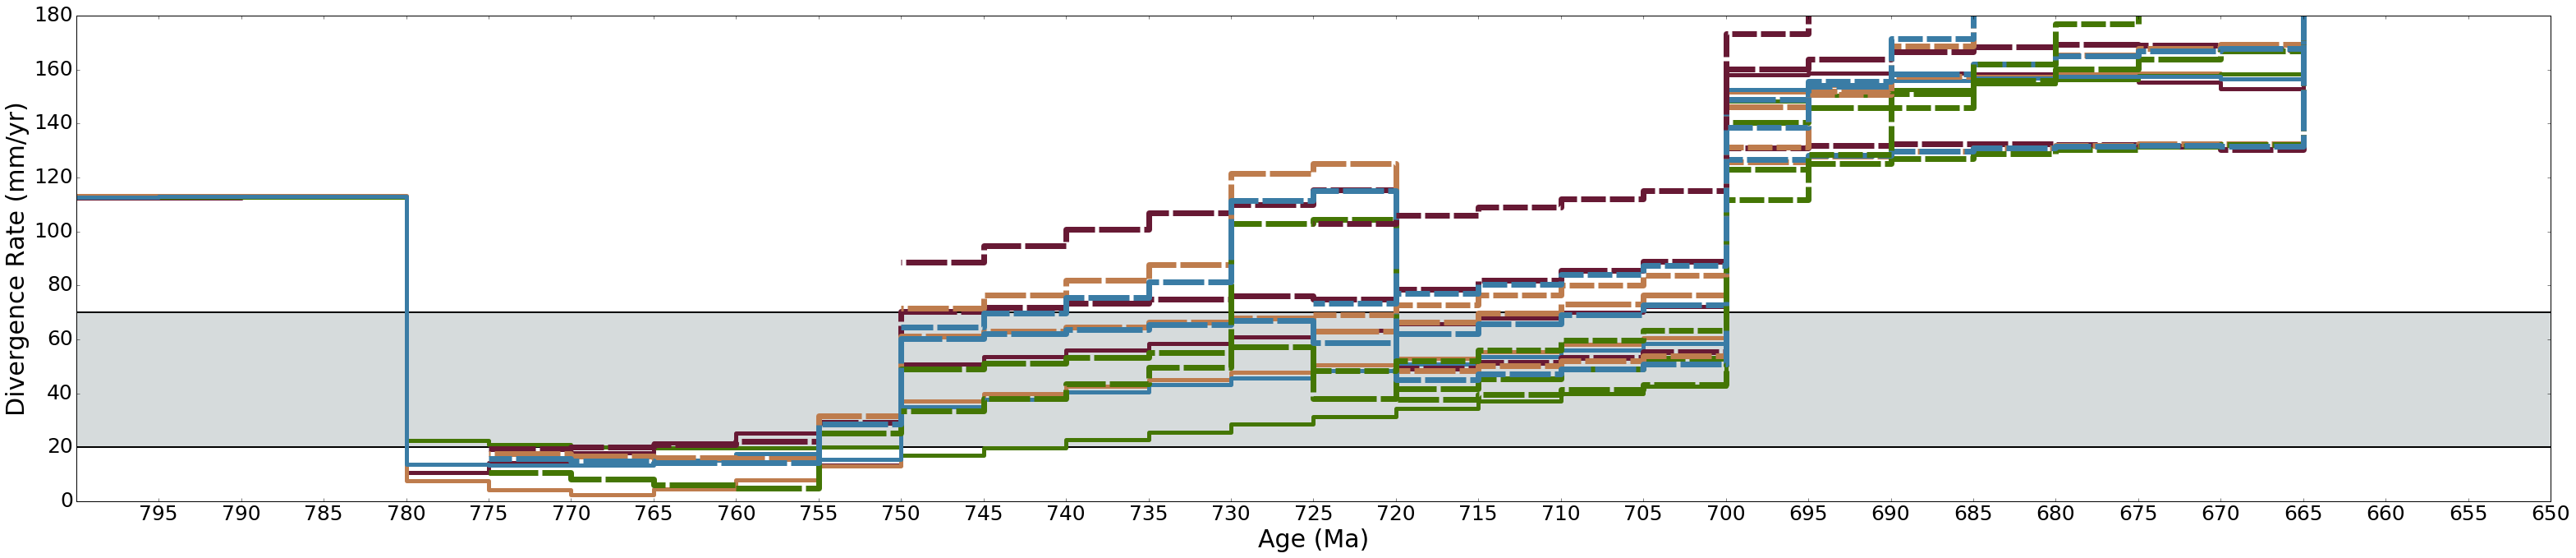

In [51]:
fig = plt.figure(figsize=(36*1.5,24*1.5),dpi=300)

plt.subplot(311)#, axisbg=('#FFF9F6'))
plt.plot(StepTime,min_spreading_rate,linewidth=2,c='k')
plt.plot(StepTime,max_spreading_rate,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.plot(StepTime,Missing_Link_rate_800_max,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,Missing_Link_rate_800_mid,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,Missing_Link_rate_800_min,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,Missing_Link_rate_800_ave,linewidth=5, ls='-', c='#3A7CA5')

plt.plot(StepTime,Missing_Link_rate_775_max,linewidth=7, ls=':', c='#671934', dashes=[80,5,80,5])
plt.plot(StepTime,Missing_Link_rate_775_mid,linewidth=7, ls=':', c='#BE7C4D', dashes=[80,5,80,5])
plt.plot(StepTime,Missing_Link_rate_775_min,linewidth=7, ls=':', c='#447604', dashes=[80,5,80,5])
plt.plot(StepTime,Missing_Link_rate_775_ave,linewidth=7, ls=':', c='#3A7CA5', dashes=[80,5,80,5])

plt.plot(StepTime,Missing_Link_rate_750_max,linewidth=7, ls='--', c='#671934', dashes=[50,5,50,5])
plt.plot(StepTime,Missing_Link_rate_750_mid,linewidth=7, ls='--', c='#BE7C4D', dashes=[50,5,50,5])
plt.plot(StepTime,Missing_Link_rate_750_min,linewidth=7, ls='--', c='#447604', dashes=[50,5,50,5])
plt.plot(StepTime,Missing_Link_rate_750_ave,linewidth=7, ls='--', c='#3A7CA5', dashes=[50,5,50,5])


plt.plot(StepTime,Missing_Link_rate_725_max,linewidth=7, ls='-.', c='#671934', dashes=[30,5,30,5])
plt.plot(StepTime,Missing_Link_rate_725_mid,linewidth=7, ls='-.', c='#BE7C4D', dashes=[30,5,30,5])
plt.plot(StepTime,Missing_Link_rate_725_min,linewidth=7, ls='-.', c='#447604', dashes=[30,5,30,5])
plt.plot(StepTime,Missing_Link_rate_725_ave,linewidth=7, ls='-.', c='#3A7CA5', dashes=[30,5,30,5])

plt.plot()
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(0,180)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'Missing_Link_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)


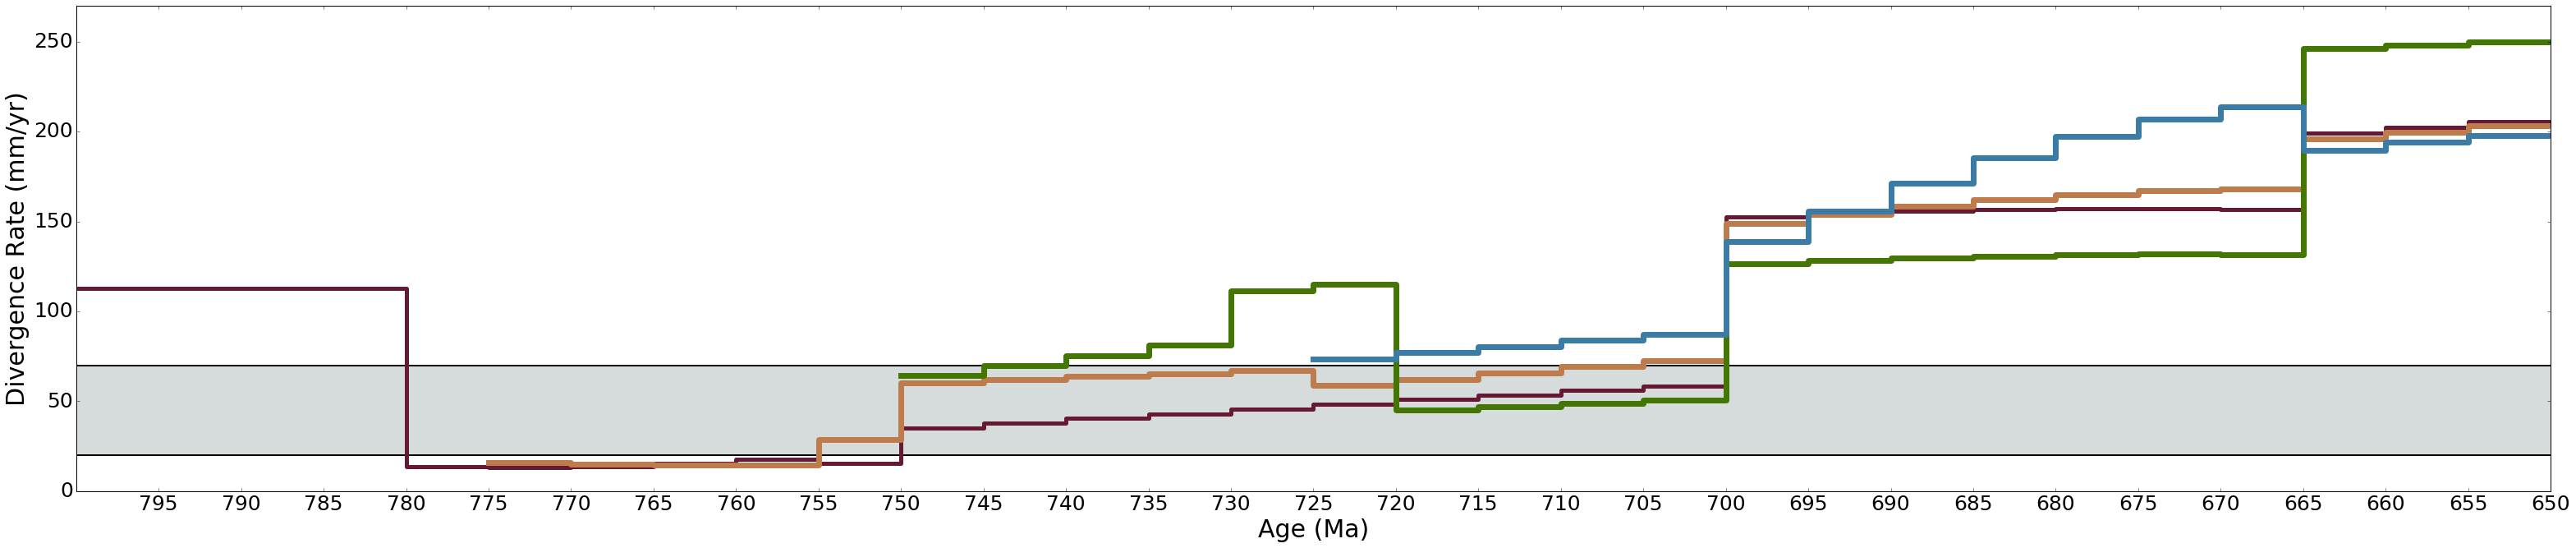

In [52]:
fig = plt.figure(figsize=(36*1.5,24*1.5),dpi=300)

plt.subplot(311)#, axisbg=('#FFF9F6'))
plt.plot(StepTime,min_spreading_rate,linewidth=2,c='k')
plt.plot(StepTime,max_spreading_rate,linewidth=2,c='k')
plt.axhspan(20, 70, alpha=0.2, color='#354F52')

plt.plot(StepTime,Missing_Link_rate_800_ave,linewidth=5, ls='-', c='#671934')

plt.plot(StepTime,Missing_Link_rate_775_ave,linewidth=7, ls='-', c='#BE7C4D')

plt.plot(StepTime,Missing_Link_rate_750_ave,linewidth=7, ls='-', c='#447604')

plt.plot(StepTime,Missing_Link_rate_725_ave,linewidth=7, ls='-', c='#3A7CA5')

plt.plot()
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
plt.ylim(0,270)
plt.ylabel('Divergence Rate (mm/yr)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'Missing_Link_spreading_rates.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)


In [53]:
Missing_Link_direc_800_ave

array([ 257.74687884,  257.74687884,  256.62628606,  256.62628606,
        255.98722443,  255.98722443,  305.92641928,  305.92641928,
        302.49589091,  302.49589091,  298.46438558,  298.46438558,
        293.82740161,  293.82740161,  288.5927399 ,  288.5927399 ,
        282.78417519,  282.78417519,  276.44423336,  276.44423336,
        -30.74797755,  -30.74797755,  -33.35259536,  -33.35259536,
         84.04184783,   84.04184783,  201.45466222,  201.45466222,
        198.91060559,  198.91060559,  196.44173514,  196.44173514,
        194.09035682,  194.09035682,  191.91398387,  191.91398387,
        309.99415658,  309.99415658,  308.4530742 ,  308.4530742 ,
        143.34314546,  143.34314546,  208.11034498,  208.11034498,
        197.76162182,  197.76162182,  174.1003185 ,  174.1003185 ,
        149.56125823,  149.56125823,  141.00895968,  141.00895968,
        -37.54999357,  -37.54999357,  197.60651245,  197.60651245,
        312.47605635,  312.47605635,  307.04248281,  307.04248

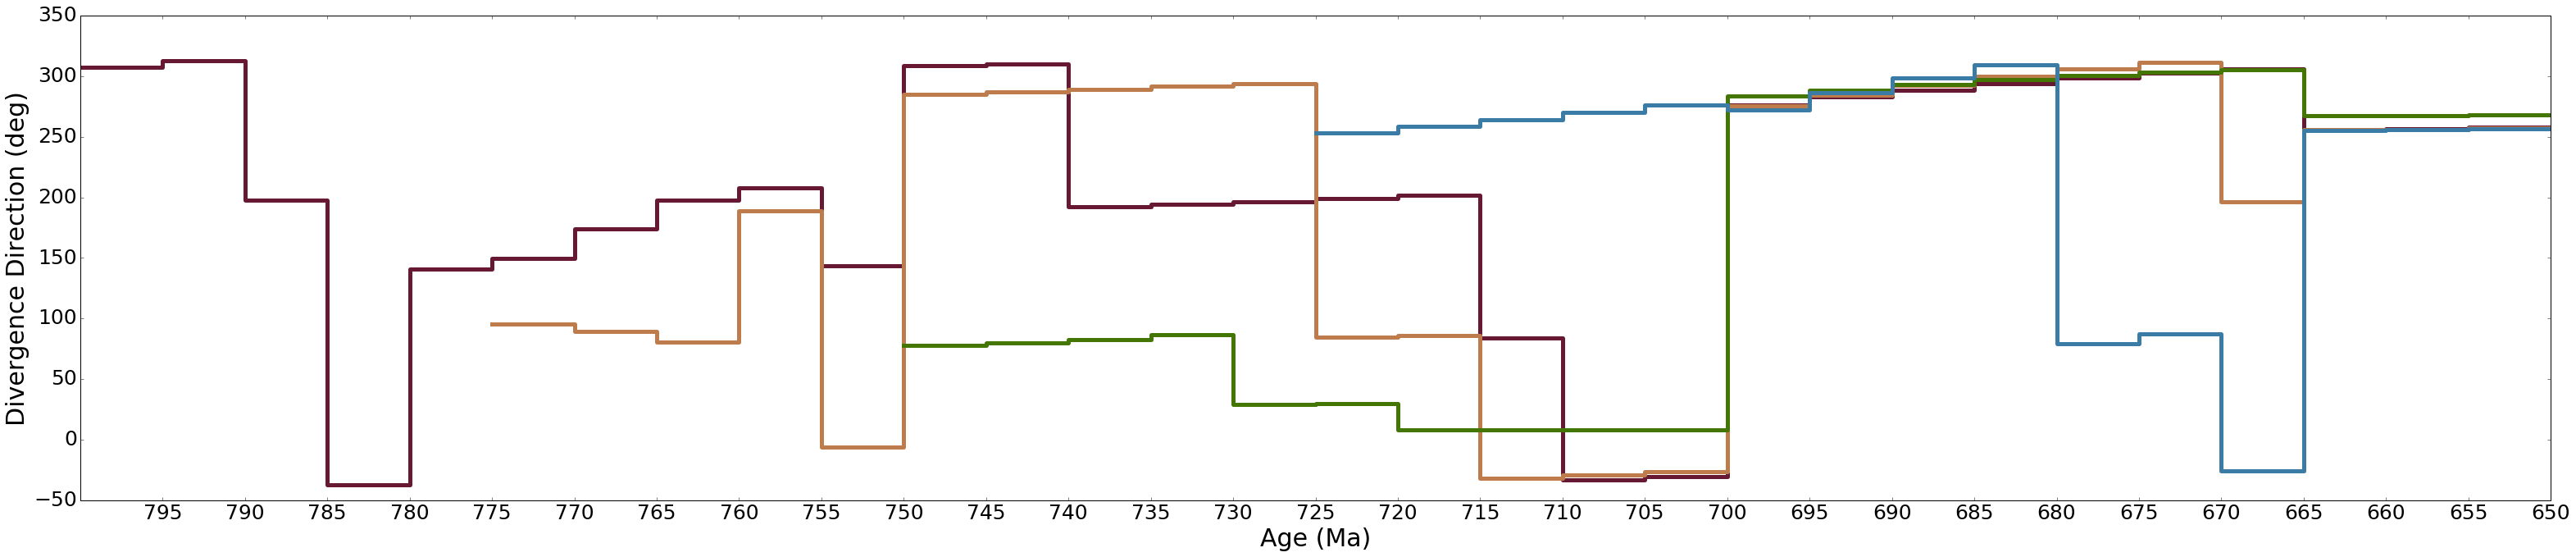

In [55]:
fig = plt.figure(figsize=(36*1.5,24*1.5),dpi=300)

plt.subplot(311)

plt.plot(StepTime,Missing_Link_direc_800_ave,linewidth=5, ls='-', c='#671934')
plt.plot(StepTime,Missing_Link_direc_775_ave,linewidth=5, ls='-', c='#BE7C4D')
plt.plot(StepTime,Missing_Link_direc_750_ave,linewidth=5, ls='-', c='#447604')
plt.plot(StepTime,Missing_Link_direc_725_ave,linewidth=5, ls='-', c='#3A7CA5')

plt.subplot(311)
plt.xlim(800, 650)
plt.xticks(np.arange(650,800,5),fontsize=ticks_font_size)
plt.xlabel('Age (Ma)',fontsize=axis_font_size)
#plt.ylim(200,320)
plt.ylabel('Divergence Direction (deg)',fontsize=axis_font_size)
plt.yticks(fontsize=ticks_font_size)

fname = 'ML_MOR_Orientation.pdf'
fig.savefig(fname, bbox_inches='tight', dpi=300)